## On the entropic centrality of nodes in flow networks

We show how to compute the path entropic centrality of nodes in flow networks.
Several graph examples are considered, plots are provided by networkx.

We define a small graph, the format is a dictionary of lists, the keys are the nodes, and the values are the (out-)neighbours in the graph. We then export this format into a networkx format, and plot it.

In [1]:
G1dict = {1:[2,4],2:[3,4],3:[1,4],4:[]}

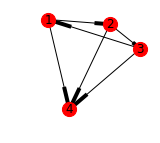

In [2]:
import networkx as nx
import pylab as plt

#this tells how to import a directed graph in format dictionary of lists to networkx
G1nx = nx.DiGraph(G1dict)

#this fixes the size of the figure
plt.figure(1,figsize=(2,2)) 

#this draws the graph 
#this first gives the layout
pos = nx.spring_layout(G1nx)
#this draws the nodes
nx.draw_networkx_nodes(G1nx, pos, node_color = 'red', node_size = 200)
#this draws the labels of the nodes
nx.draw_networkx_labels(G1nx,pos)
#this draws the edges
nx.draw_networkx_edges(G1nx, pos, edge_color='black', arrows=True)
#this removes the axes from the display
plt.axis('off')
plt.show()


We then change the description of the same graph to include self-loops, and we test this graph in the function that computes the paths and their probabilities.

In [3]:
G1 = {1:['1l',2,4],2:['2l',3,4],3:['3l',1,4],4:[],'1l':[],'2l':[],'3l':[]}

In [1]:
def paths_prob(G, u):
    #G is a graph in format a list of dictionaries
    #u is the starting point of the path
    #the output is a list of the maximal cycle-free paths in the graph starting at v
    #for every node in these paths, a probability is attached that this node was chosen uniformly at random
    #reference: https://codereview.stackexchange.com/questions/55767/finding-all-paths-from-a-given-graph
   
    #path is a list which starts at u 
    path = [u]
    prob = [1]
    visited = {u}                  
    def search():
        done = True
        #G[i] contains the neighbours of i
        #look at the neighbours of the last node visited
        for neighbour in G[path[-1]]:
            if neighbour not in visited:
                done = False
                #compute probability of reaching neighbour
                unvisited_neighbours = len([v for v in G[path[-1]] if v not in visited])
                prob.append(prob[-1]/unvisited_neighbours)
                #update visited and path
                visited.add(neighbour)
                path.append(neighbour)
                yield from search()
                #now that visited and path are kept by yield, go back to parent node
                path.pop()
                visited.remove(neighbour)
                prob.pop()
        if done:
            yield list(path),list(prob)
    yield from search()
    

We next use the output of the above function to compute the entropic centrality.

In [2]:
from math import log2

def entropy_centrality(G):
    #take as input a graph G whose format is a list of dictionaries 
    
    #counts the number of vertices
    N = len(G)
    #stores the probabilities p_uj
    p = []
    #stores the entropy centrality
    C_H = []
    
    #uncomment to get output printed in a file
    #open file, the file must exist first, touch out.txt does it
    #f = open('out.txt', 'r+')
    
    #add self-loops to the current graph, no self-loop is added if the node is a leaf
    for k in [key for key in G.keys() if G[key]]:
        #adds the corresponding edges
        G[k].append('%dl'%k)
        #adds the nodes representing self-loop
        G['%dl'%k] = []
        
    #computes the paths from u and their corresponding probabilities
    for u in [key for key in G.keys() if key in range(1,N+1)]:
        #collects paths from u
        path_u = list(paths_prob(G,u))
        p.append([sum([path_u[i][1][-1] for i in range(0,len(path_u)) if path_u[i][0][-1] in ['%dl'%j,j]]) for j in range(1,N+1)])
        C_H.append(-sum([i*log2(i) for i in p[u-1] if i != 0]))
        
        #uncomment to get output printed in a file
        #write to file
        #f.write(str(u)+','+str(C_H[-1])+'\n')
    #f.close()
    
    return p, C_H

We test the entropic centrality on our small example. The intput is the graph, whose format is a dictionary of lists.

In [11]:
G1dict = {1:[2,4],2:[3,4],3:[1,4],4:[]}
p1,CH1=entropy_centrality(G1dict)
print('The probabilities of going from i to j are:')
print(p1)
print('The entropic centralities of each node are:')
print(CH1)

The probabilities of going from i to j are:
[[0.3333333333333333, 0.1111111111111111, 0.05555555555555555, 0.5], [0.05555555555555555, 0.3333333333333333, 0.1111111111111111, 0.5], [0.1111111111111111, 0.05555555555555555, 0.3333333333333333, 0.5], [0, 0, 0, 1]]
The entropic centralities of each node are:
[1.612197222702993, 1.612197222702993, 1.612197222702993, -0.0]


We remove the edge (3,1) to break the symmetry.

In [3]:
G1dict = {1:[2,4],2:[3,4],3:[4],4:[]}
p1,CH1=entropy_centrality(G1dict)
print('The probabilities of going from i to j are:')
print(p1)
print('The entropic centralities of each node are:')
print(CH1)

The probabilities of going from i to j are:
[[0.3333333333333333, 0.1111111111111111, 0.05555555555555555, 0.5], [0, 0.3333333333333333, 0.16666666666666666, 0.5], [0, 0, 0.5, 0.5], [0, 0, 0, 1]]
The entropic centralities of each node are:
[1.612197222702993, 1.4591479170272448, 1.0, -0.0]


We consider the Boston gang alliance network as a second example.

In [4]:
G2dict = {1:[2],2:[1,3],3:[2,5],4:[5],5:[3,4,6],6:[5,7],7:[6,8,10],8:[7,9,10],9:[8,10],10:[7,8,9,11],11:[10]}

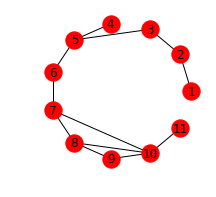

In [6]:
import networkx as nx
import pylab as plt

#this tells how to import an undirected graph in format dictionary of lists to networkx
G2nx = nx.Graph(G2dict)

#this fixes the size of the figure
plt.figure(1,figsize=(3,3)) 

#this draws the graph 
#nx.draw(G2nx)
#this gives the layout
#options are: circular, random, shell, spring and spectral
pos = nx.shell_layout(G2nx)
#this draws the nodes
nx.draw_networkx_nodes(G2nx, pos, node_color = 'red', node_size = 300)
#this draws the labels of the nodes
nx.draw_networkx_labels(G2nx,pos)
#this draws the edges
nx.draw_networkx_edges(G2nx, pos, edge_color='black', arrows=False)
#this removes the axes from the display
plt.axis('off')
plt.show()


After plotting the Boston gang alliance network, we compute the entropic centrality of each node.

In [3]:
G2dict = {1:[2],2:[1,3],3:[2,5],4:[5],5:[3,4,6],6:[5,7],7:[6,8,10],8:[7,9,10],9:[8,10],10:[7,8,9,11],11:[10]}
p2,CH2=entropy_centrality(G2dict)
sorted(CH2)  

[2.0365580559443015,
 2.3003732419802243,
 2.304427348415661,
 2.396232223777205,
 2.657867670785193,
 2.68245064990596,
 2.805890742148083,
 2.80901185235242,
 2.9056264601249415,
 3.005657197798925,
 3.0282872279613846]

We compute a few examples in the undirected case, we observe the growth of the entropy coefficients.

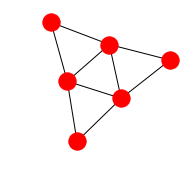

[2.0535851432069303,
 2.0535851432069303,
 2.1230046306621437,
 2.1717970568205858,
 2.1717970568205858]

In [17]:
Gdgm2 = nx.dorogovtsev_goltsev_mendes_graph(2)
plt.figure(1,figsize=(2,2)) 
nx.draw(Gdgm2)
plt.show()
Ddgm2 = nx.to_dict_of_lists(Gdgm2)
pdgm2,CHdgm2=entropy_centrality(Ddgm2)
sorted(CHdgm2)

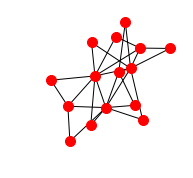

[3.1186605136603593,
 3.1186605136603593,
 3.1908052348953566,
 3.190805234895357,
 3.2013786043991543,
 3.2013786043991543,
 3.2240808386865822,
 3.2240808386865827,
 3.2806256512026204,
 3.375890316209655,
 3.375890316209655,
 3.452320173504659,
 3.6126903159822112,
 3.6126903159822117]

In [23]:
Gdgm3 = nx.dorogovtsev_goltsev_mendes_graph(3)
plt.figure(1,figsize=(2,2)) 
options = {
 'with_labels': False,
 'node_color': 'red',
 'node_size': 100,
 'width': 1,
}
nx.draw(Gdgm3,**options)
plt.show()
Ddgm3 = nx.to_dict_of_lists(Gdgm3)
pdgm3,CHdgm3=entropy_centrality(Ddgm3)
sorted(CHdgm3)

We now try to get some examples of directed graphs.

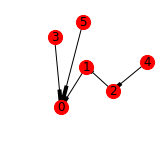

[0.5, 0.5, 0.5, 1.0, 1.375]

In [28]:
Gd6 = nx.gn_graph(6)

#this fixes the size of the figure
plt.figure(1,figsize=(2,2)) 

#this draws the graph 
#this first gives the layout
pos = nx.spring_layout(Gd6)
#this draws the nodes
nx.draw_networkx_nodes(Gd6, pos, node_color = 'red', node_size = 200)
#this draws the labels of the nodes
nx.draw_networkx_labels(Gd6,pos)
#this draws the edges
nx.draw_networkx_edges(Gd6, pos, edge_color='black', arrows=True)
#this removes the axes from the display
plt.axis('off')
plt.show()
Dd6 = nx.to_dict_of_lists(Gd6)
pd6,CHd6=entropy_centrality(Dd6)
sorted(CHd6)

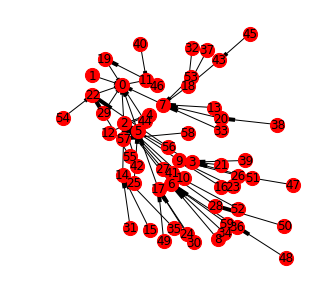

Counter({0.5: 9, 1.0: 21, 1.375: 23, 1.625: 5, 1.78125: 1})

In [36]:
from collections import Counter

Gd60 = nx.gn_graph(60)

#this fixes the size of the figure
plt.figure(1,figsize=(5,5)) 

#this draws the graph 
#this first gives the layout
pos = nx.spring_layout(Gd60)
#this draws the nodes
nx.draw_networkx_nodes(Gd60, pos, node_color = 'red', node_size = 200)
#this draws the labels of the nodes
nx.draw_networkx_labels(Gd60,pos)
#this draws the edges
nx.draw_networkx_edges(Gd60, pos, edge_color='black', arrows=True)
#this removes the axes from the display
plt.axis('off')
plt.show()
Dd60 = nx.to_dict_of_lists(Gd60)
pd60,CHd60=entropy_centrality(Dd60)
Counter(CHd60)

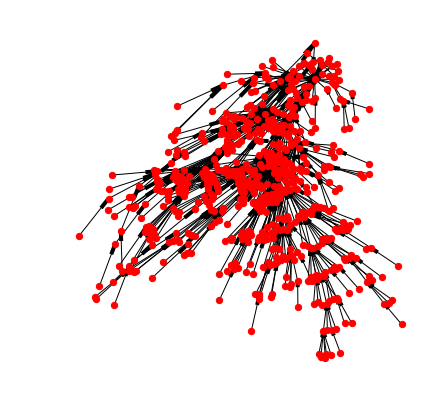

Counter({0.5: 45,
         1.0: 80,
         1.375: 113,
         1.625: 130,
         1.78125: 112,
         1.875: 67,
         1.9296875: 33,
         1.9609375: 12,
         1.978515625: 7})

In [45]:
from collections import Counter

Gd600 = nx.gn_graph(600)

#this fixes the size of the figure
plt.figure(1,figsize=(7,7)) 

#this draws the graph 
#this first gives the layout
pos = nx.spring_layout(Gd600)
#this draws the nodes
nx.draw_networkx_nodes(Gd600, pos, node_color = 'red', node_size = 40)
#this draws the edges
nx.draw_networkx_edges(Gd600, pos, edge_color='black', arrows=True)
#this removes the axes from the display
plt.axis('off')
plt.show()
Dd600 = nx.to_dict_of_lists(Gd600)
pd600,CHd600=entropy_centrality(Dd600)
Counter(CHd600)

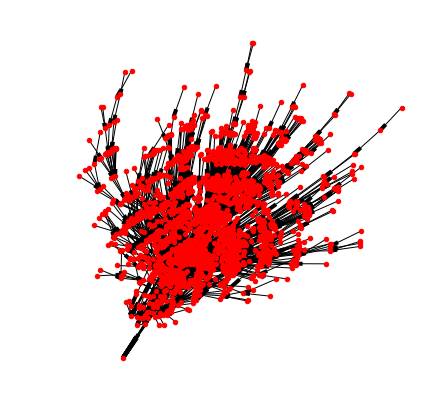

Counter({0.5: 11,
         1.0: 62,
         1.375: 309,
         1.625: 477,
         1.78125: 518,
         1.875: 372,
         1.9296875: 165,
         1.9609375: 61,
         1.978515625: 16,
         1.98828125: 6,
         1.99365234375: 2})

In [48]:
from collections import Counter

Gd2000 = nx.gn_graph(2000)

#this fixes the size of the figure
plt.figure(1,figsize=(7,7)) 

#this draws the graph 
#this first gives the layout
pos = nx.spring_layout(Gd2000)
#this draws the nodes
nx.draw_networkx_nodes(Gd2000, pos, node_color = 'red', node_size = 20)
#this draws the edges
nx.draw_networkx_edges(Gd2000, pos, edge_color='black', arrows=True)
#this removes the axes from the display
plt.axis('off')
plt.show()
Dd2000 = nx.to_dict_of_lists(Gd2000)
pd2000,CHd2000=entropy_centrality(Dd2000)
Counter(CHd2000)

Next we try data from the Bitcoin network.

In [25]:
fh=open("/home/elise/Documents/NTUwork/isita18/subgraph3198.txt", 'rb')
G3k = nx.read_edgelist(fh,delimiter=',',create_using=nx.DiGraph())
G3k.order()

3200

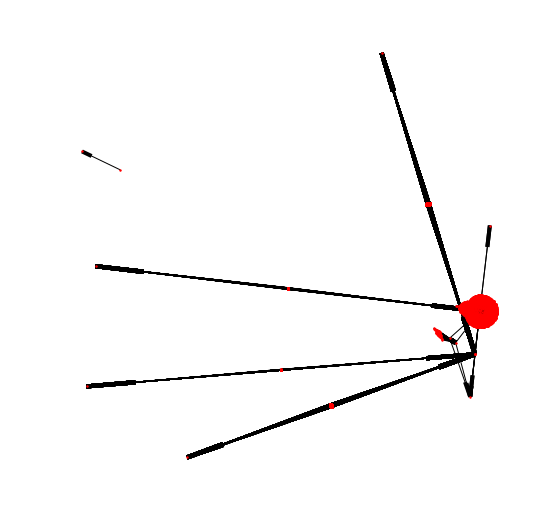

In [26]:
#this fixes the size of the figure
plt.figure(1,figsize=(9,9)) 

#this draws the graph 
#this first gives the layout
pos = nx.spring_layout(G3k)
#this draws the nodes
nx.draw_networkx_nodes(G3k, pos, node_color = 'red', node_size = 2)
#this draws the edges
nx.draw_networkx_edges(G3k, pos, edge_color='black', arrows=True)
#this removes the axes from the display
plt.axis('off')
plt.show()

In [31]:
from collections import Counter

G3k = nx.convert_node_labels_to_integers(G3k, first_label=0, ordering='default')
D3k = nx.to_dict_of_lists(G3k)
p3k,CH3k=entropy_centrality(D3k)
Counter(CH3k)

Counter({-0.0: 7,
         1.584962500721156: 2,
         1.7527152789797045: 1,
         1.7527152789797047: 5,
         1.7924812503605778: 447,
         1.792481250360578: 1278,
         1.8763576394898522: 59,
         2.113283334294875: 148,
         2.1692009270477244: 968,
         2.169200927047725: 284})

In [32]:
fh=open("/home/elise/Documents/NTUwork/isita18/subgraph5206.txt", 'rb')
G5k = nx.read_edgelist(fh,delimiter=',',create_using=nx.DiGraph())
G5k.order()

5208

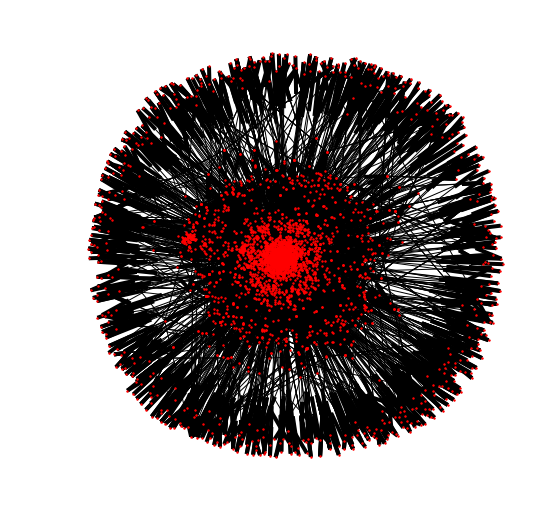

In [33]:
#this fixes the size of the figure
plt.figure(1,figsize=(9,9)) 

#this draws the graph 
#this first gives the layout
pos = nx.spring_layout(G5k)
#this draws the nodes
nx.draw_networkx_nodes(G5k, pos, node_color = 'red', node_size = 2)
#this draws the edges
nx.draw_networkx_edges(G5k, pos, edge_color='black', arrows=True)
#this removes the axes from the display
plt.axis('off')
plt.show()

This network is computationally hard for the above code. One possibility to handle this network is too set a threshold after which a probability is considered to be zero, and then paths are stopped.